In [28]:
!pip install matplotlib

In [20]:
# read all latencies json files for plotting
import json
import glob
import os
import matplotlib.pyplot as plt

def read_json_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

files = glob.glob("latency_results*w1.0sml128mnt256.json")
latency_data = {}
for file in files:
    data = read_json_file(file)
    latency_data.update(data)


In [15]:
latency_data.keys()

dict_keys(['l22w1.0sml128mnt128', 'l24w1.0sml128mnt128', 'l17w1.0sml128mnt128', 'l23w1.0sml128mnt128', 'l32w1.0sml128mnt128', 'l25w1.0sml128mnt128', 'l16w1.0sml128mnt128', 'l20w1.0sml128mnt128', 'l31w1.0sml128mnt128', 'l18w1.0sml128mnt128', 'l26w1.0sml128mnt128', 'l30w1.0sml128mnt128', 'l21w1.0sml128mnt128', 'l19w1.0sml128mnt128', 'l27w1.0sml128mnt128'])

In [27]:
layers = list(range(16, 33))

# remove 18, 19, 29, 31
layers.remove(18)
layers.remove(19)
layers.remove(29)
layers.remove(31)

print(layers)

mean_ttft_bs_1 = []
mean_ttft_bs_2 = []
mean_ttft_bs_4 = []

std_ttft_bs_1 = []
std_ttft_bs_2 = []
std_ttft_bs_4 = []

mean_tbt_bs_1 = []
mean_tbt_bs_2 = []
mean_tbt_bs_4 = []

std_tbt_bs_1 = []
std_tbt_bs_2 = []
std_tbt_bs_4 = []

for layer in layers:
    key = f'l{layer}w1.0sml128mnt256'
    for item in latency_data[key]:
        if item['batch_size'] == 1:
            mean_ttft_bs_1.append(item['mean_ttft'])
            std_ttft_bs_1.append(item['std_ttft'])
            mean_tbt_bs_1.append(item['mean_tbt'])
            std_tbt_bs_1.append(item['std_tbt'])
        elif item['batch_size'] == 2:
            mean_ttft_bs_2.append(item['mean_ttft'])
            std_ttft_bs_2.append(item['std_ttft'])
            mean_tbt_bs_2.append(item['mean_tbt'])
            std_tbt_bs_2.append(item['std_tbt'])
        elif item['batch_size'] == 4:
            mean_ttft_bs_4.append(item['mean_ttft'])
            std_ttft_bs_4.append(item['std_ttft'])
            mean_tbt_bs_4.append(item['mean_tbt'])
            std_tbt_bs_4.append(item['std_tbt'])

[16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32]


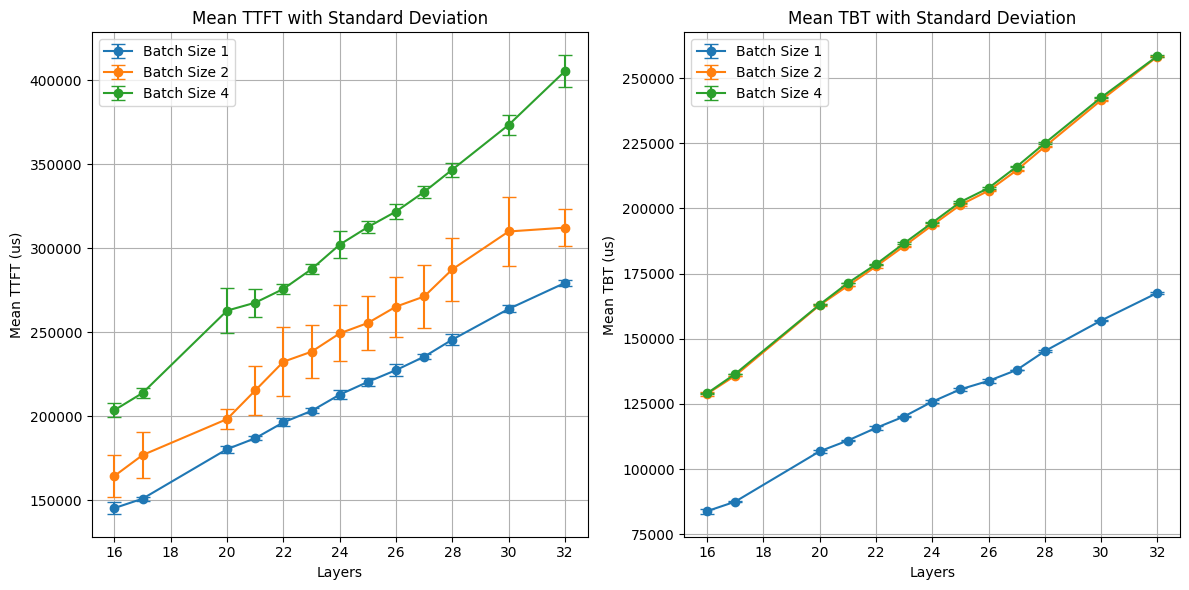

In [28]:
# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.errorbar(layers, mean_ttft_bs_1, yerr=std_ttft_bs_1, label='Batch Size 1', fmt='o-', capsize=5)
plt.errorbar(layers, mean_ttft_bs_2, yerr=std_ttft_bs_2, label='Batch Size 2', fmt='o-', capsize=5)
plt.errorbar(layers, mean_ttft_bs_4, yerr=std_ttft_bs_4, label='Batch Size 4', fmt='o-', capsize=5)
plt.title('Mean TTFT with Standard Deviation')
plt.xlabel('Layers')
plt.ylabel('Mean TTFT (us)')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.errorbar(layers, mean_tbt_bs_1, yerr=std_tbt_bs_1, label='Batch Size 1', fmt='o-', capsize=5)
plt.errorbar(layers, mean_tbt_bs_2, yerr=std_tbt_bs_2, label='Batch Size 2', fmt='o-', capsize=5)
plt.errorbar(layers, mean_tbt_bs_4, yerr=std_tbt_bs_4, label='Batch Size 4', fmt='o-', capsize=5)
plt.title('Mean TBT with Standard Deviation')
plt.xlabel('Layers')
plt.ylabel('Mean TBT (us)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('latency_plot.png')

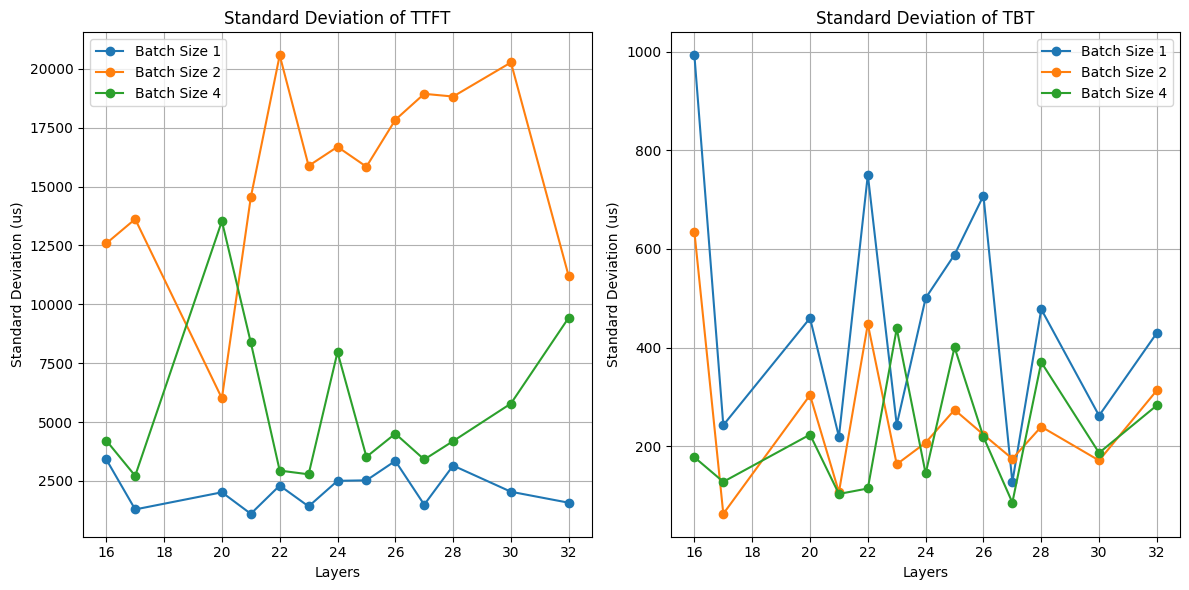

In [29]:
# Plot only the std for all layers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(layers, std_ttft_bs_1, label='Batch Size 1', marker='o')
plt.plot(layers, std_ttft_bs_2, label='Batch Size 2', marker='o')
plt.plot(layers, std_ttft_bs_4, label='Batch Size 4', marker='o')
plt.title('Standard Deviation of TTFT')
plt.xlabel('Layers')
plt.ylabel('Standard Deviation (us)')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(layers, std_tbt_bs_1, label='Batch Size 1', marker='o')
plt.plot(layers, std_tbt_bs_2, label='Batch Size 2', marker='o')
plt.plot(layers, std_tbt_bs_4, label='Batch Size 4', marker='o')
plt.title('Standard Deviation of TBT')
plt.xlabel('Layers')
plt.ylabel('Standard Deviation (us)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('latency_std_plot.png')
plt.show()